# Quantized FACILE Training with Brevitas
This notebook walks through the steps to train and and validate the Pytorch Brevitas reconstruction of the HCAL Facile model

Initial Pytorch conversion by Vladimir Oveckhin
Pytorch to Brevitas conversion by Matthew Trahms

In [1]:
#install pandas (missing in FINN env)
!pip install --user pandas

     |################################| 9.5MB 1.9MB/s eta 0:00:01


In [2]:
#import the necessary classes and functions
from train import train
from metrics import Metrics
from quant_model import QuantNet
from quant_modelV2 import QuantNet_opt

In [3]:
models_folder = 'quant_models'

X_train shape: (229538, 14)
X_val shape: (12752, 14)
X_test shape: (12752, 14)
Y_train shape: (229538, 1)
Y_val shape: (12752, 1)
Y_test shape: (12752, 1)
Using saved split data
Number of batches per epoch: 460
# of Model parameters: 982.0
# of features: 14


Epoch 1
Ave Train Loss: 3.2727729520756266
Ave Val Loss: 133.10371738009982
Min Ave Val Loss: 133.10371738009982
Saved model


Epoch 2
Ave Train Loss: 2.3146848694293842
Ave Val Loss: 101.14813111320375
Min Ave Val Loss: 101.14813111320375
Saved model


Epoch 3
Ave Train Loss: 1.786318168849204
Ave Val Loss: 79.78550877646795
Min Ave Val Loss: 79.78550877646795
Saved model


Epoch 4
Ave Train Loss: 1.4297940065311303
Ave Val Loss: 64.87927064441499
Min Ave Val Loss: 64.87927064441499
Saved model


Epoch 5
Ave Train Loss: 1.173637180171984
Ave Val Loss: 53.812103513687376
Min Ave Val Loss: 53.812103513687376
Saved model


Epoch 6
Ave Train Loss: 0.989156763124163
Ave Val Loss: 45.43124335152762
Min Ave Val Loss: 45.43124335152762
S

Ave Train Loss: 0.21377755122148234
Ave Val Loss: 11.271157158745659
Min Ave Val Loss: 10.25243159702846


Epoch 54
Ave Train Loss: 0.21513761354478037
Ave Val Loss: 12.217844705733041
Min Ave Val Loss: 10.25243159702846


Epoch 55
Ave Train Loss: 0.22074121382269532
Ave Val Loss: 9.981116627889966
Min Ave Val Loss: 9.981116627889966
Saved model


Epoch 56
Ave Train Loss: 0.21353013970688223
Ave Val Loss: 9.789493500240265
Min Ave Val Loss: 9.789493500240265
Saved model


Epoch 57
Ave Train Loss: 0.21248287878684724
Ave Val Loss: 11.138240980723548
Min Ave Val Loss: 9.789493500240265


Epoch 58
Ave Train Loss: 0.2092435338869449
Ave Val Loss: 10.236653766934834
Min Ave Val Loss: 9.789493500240265


Epoch 59
Ave Train Loss: 0.20994271597125896
Ave Val Loss: 9.910865859379845
Min Ave Val Loss: 9.789493500240265


Epoch 60
Ave Train Loss: 0.2119310498834856
Ave Val Loss: 13.311173272511315
Min Ave Val Loss: 9.789493500240265


Epoch 61
Ave Train Loss: 0.21119961177154287
Ave Val Loss: 10.

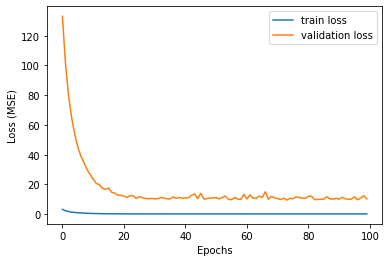

In [5]:
#train (mimicing structure in train.py)
metrics = Metrics()
model = None
try:
    model = train(QuantNet_opt, metrics=metrics, models_folder_path=models_folder, quantized=True)
except KeyboardInterrupt:
    print("Interrupted")
finally:
    metrics.plot_losses()

In [9]:
#export to onnx finn format
from brevitas.onnx import export_finn_onnx
input_shape = [1,14]
export_finn_onnx(model, input_shape, models_folder + "/facileV2_4b_1.onnx")